## Pandas
- Panel Datas 의 약자

#### pandas 에서 제공하는 데이터 구조
- Series 데이터 구조 : 1차원
- 인덱스(index) + 값(value)
- DataFrame 데이터 구조 : 2차원
- 서로 다른 종류의 자료형을 저장할 수 있다.
- 1차원의 Series가 모여 2차원의 DataFrame이 된다.

In [12]:
# pandas 라이브러리 불러오기
import pandas as pd

### Series 데이터 구조
- 1차원 형태의 데이터 구조
- 인덱스와 같이 1:1로 구성되어 있는 형태

In [13]:
# Series 생성하기 (리스트 활용)
# 인덱스가 자동으로 부여되기 때문에 어떤 데이터인지 알아보기 어렵다
pop = pd.Series([9904312,3448737,2890451,1466052])
pop

0    9904312
1    3448737
2    2890451
3    1466052
dtype: int64

In [14]:
pop = pd.Series([9904312,3448737,2890451,1466052], index = ['서울', '부산', '인천', '광주'])
pop

서울    9904312
부산    3448737
인천    2890451
광주    1466052
dtype: int64

### 데이터 확인하기


In [15]:
# Series의 값 확인하기
# Series이름.values
pop.values

array([9904312, 3448737, 2890451, 1466052], dtype=int64)

In [16]:
# Series의 인덱스 확인하기
# Series이름. index

pop.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [17]:
# Series 데이터들의 타입 확인하기
# Series이름.dtype   
pop.dtype
# dtype은 value값의 타입만 알려준다

dtype('int64')

In [18]:
# Series에 이름을 저장
# 이름을 지정해주면 시리즈가 훨씬 직관적으로 알어먹기 쉽게 표현된다.
# .name = '원하는이름'
pop.name = '인구수'
pop

서울    9904312
부산    3448737
인천    2890451
광주    1466052
Name: 인구수, dtype: int64

In [19]:
# Series 데이터의 인덱스에 이름지정
# 인덱스에도 마찬가지로 이름을 부여해주면 훨씬 직관적으로 표현된다.
# Series이름.index.name = '지어줄이름'

pop.index.name = '도시'
pop

도시
서울    9904312
부산    3448737
인천    2890451
광주    1466052
Name: 인구수, dtype: int64

### Series 연산 
- 요소별 연산이 가능하다.

In [20]:
# pop / 100만
pop / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
광주    1.466052
Name: 인구수, dtype: float64

### Series 인덱싱 & 슬라이싱 

In [21]:
# 광주의 인구수를 출력
print(pop[3])
# 인덱스 위치에 명칭을 부여해주었기 때문에 실제 값을 넣어서 사용해도 된다
print(pop['광주'])


1466052
1466052


In [22]:
# 인덱스 이름까지 가져오기 --> 시리즈 자체를 출력하면 됨
# 1차원 배열이지만 인덱스를 강제로 만듦으로서 2차원배열처럼 보이기때문에 대괄호 두개안에 값을 넣으면 이름까지 출력 가능
pop[[3]]
pop[['광주']]

도시
광주    1466052
Name: 인구수, dtype: int64

In [23]:
# 인덱스 번호를 이용해서 서울, 광주, 부산 값 한번에 가져오기
# 한번에 여러 값 인덱싱 하기
# 인덱싱에 쓰이는 대괄호[] 안에 콤마(,) 하나만 존재한다면 [행,열]을 나타내는 2차원 인덱싱
# 복수개의 데이터를 출력해줄 때는 반드시 대괄호로 감싸주어야 한다
pop[[0,1,3]]
pop[['서울', '부산', '광주']]


도시
서울    9904312
부산    3448737
광주    1466052
Name: 인구수, dtype: int64

In [24]:
# 부산 ~ 인천 범위 데이터 가져오기 
# 1. 슬라이싱 : [시작값: 끝값(포함X)]
pop[1:3]

# 2. 인덱스 이름사용 : [시작값 : 끝값(포함O)]
# - 인덱스와 달리 순서가 없기때문에 포함된다
pop['부산':'광주']

# 3. 여러 값을 인덱싱
pop[[1,2]]

도시
부산    3448737
인천    2890451
Name: 인구수, dtype: int64

### Series 불리언 인덱싱

In [25]:
# 인구수가 250만 이상인 도시들만 출력
pop >= 2500000 #논리연산 결과(boolean 자료형)

# 불리언 인덱싱의 재료
pop[pop>=2500000]

도시
서울    9904312
부산    3448737
인천    2890451
Name: 인구수, dtype: int64

In [26]:
# 인구수가 250만 이상, 500만이하인 도시 찾기 (다중조건 불리언 인덱싱)
# and : &
# or  : \

pop[(pop>=2500000) & (pop<=5000000)] #pop의 값을 먼저 설정하고 &로 비교해야하기때문에 ()안에 담아줌

도시
부산    3448737
인천    2890451
Name: 인구수, dtype: int64

#### 딕셔너리 자료형으로 Series 생성
- 딕셔너리는 key와 value로 구성
- key값은 index
- value값은 value

In [27]:
data ={'서울' : 9631482,
       '부산' : 3393191,
       '인천' : 2632035,
       '대전' : 1490158}

# 딕셔너리 데이터를 Series로 변환
pop2 = pd.Series(data)
pop2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [28]:
# 인구증가율계산 (과거대비 현재에 얼만큼 인구가 증가했는지)
# 현재 - 과거
popu = pop - pop2
popu 
# NaN : 결측치
# value 에 NaN이 출력되는데 한쪽에만 값이 존재하면 NaN을 출력한다

광주         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [29]:
# isnull() : 결측치를 보고싶을 때 사용하는 함수
a = popu.isnull()  # True/False로 결과를 리턴하면 불리언 인덱싱에 재료로 나옴
a
popu[a]

광주   NaN
대전   NaN
dtype: float64

In [30]:
# 불리언 인덱싱 --> popu에서 결측치를 가진 데이터만 보고싶다
popu[popu.isnull()]

광주   NaN
대전   NaN
dtype: float64

In [31]:
# notnull() : 결측치가 아닌 정상 데이터만 보고싶을 때
popu.notnull()

광주    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [32]:
# 2015년도 인구와 2010년도 인구의 증가율(%)을 구하기
# 증가율 : (최근 - 과거) / 과거 * 100

rs = (pop - pop2)/ pop2 * 100
# round(출력하고싶은 소수점 자리)
rs.round(3)

광주      NaN
대전      NaN
부산    1.637
서울    2.833
인천    9.818
dtype: float64

### Series 데이터 추가, 수정, 삭제


In [33]:
# 추가 및 삭제
# '대구' 인덱스에 1.41 값을 추가해보자
# 딕셔너리 키 접근 = 값 대입과 같은 표기법

# 시리즈명['인덱스'] = 추가/수정 할 값
rs['대구'] = 1.41
rs

광주         NaN
대전         NaN
부산    1.636984
서울    2.832690
인천    9.818107
대구    1.410000
dtype: float64

In [34]:
# 삭제
# '대전' 인덱스 삭제하기
# del 시리즈명['삭제할 인덱스명']
del rs['대전']
rs

광주         NaN
부산    1.636984
서울    2.832690
인천    9.818107
대구    1.410000
dtype: float64

In [35]:
# '광주' 인덱스 수정 --> 2.13 으로 값 수정
# 시리즈명['인덱스명'] = 수정할 값

rs['광주'] = 2.13
rs

광주    2.130000
부산    1.636984
서울    2.832690
인천    9.818107
대구    1.410000
dtype: float64

### DataFrame
- 2차원 데이터 구조 (표 형태 --> 행과 열로 구성되어 있다)
- 여러개의 Series(1차원) 데이터들이 모여서 구성

In [36]:
# 딕셔너리 자료형으로 DataFrame 생성

# 딕셔너리 생성
data = {"2015" : [9904312, 3448737 , 2890451, 2446052],
           "2010" : [9631482, 3393191, 2632035, 2431774]}

# key : 컬럼
# value : 데이터(튜플)
# 인덱스가 자동으로 지정됨

#DataFrame 생성과 동시에 인덱스 명칭 지정해주기
df= pd.DataFrame(data, index = ['서울', '부산', '인천', '대전'])

In [37]:
# DataFrame 인덱스 명칭 바꿔주기
# index 활용
df.index = ['서울', '부산', '인천', '광주']
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
광주,2446052,2431774


In [38]:
# 리스트 자료형으로 DataFrame 생성 (2차원)
# 데이터프레임에 들어가는 모든 값들을 하나하나 지정해줘야함 (2차원데이터, 인덱스, 컬럼)
# value가 될 리스트 (2 차원)

data2 = [[9668465,3391946,2942828,1450062],
                [10312545,3567910,2758296,1454636]]

data2

# index가 될 리스트
ind = ['2020', '2010']

# colum이 될 리스트
col = ['서울', '부산', '인천', '광주']

df1 = pd.DataFrame(data2, index = ind, columns = col)
df1

,서울,부산,인천,광주
2020,9668465,3391946,2942828,1450062
2010,10312545,3567910,2758296,1454636


In [39]:
#전치
df1.T
#전치 후에 값을 남기고 싶으면 변수에 담아줘야한다

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


### 데이터프레임 구조 확인
- values : 값,데이터 확인
- index : 인덱스 확인
- columns : 컬럼확인

In [40]:
df.columns

Index(['2015', '2010'], dtype='object')

### DataFrame 인덱싱, 슬라이싱

In [41]:
# DataFrame Indexing
df['2015']

# Series 형태로 출력됨
# DataFrame이 2가지 이상의 Series의 병합으로 구성되어 있기 때문

df[['2015']]

,2015
서울,9904312
부산,3448737
인천,2890451
광주,2446052


In [42]:
# 두 개의 열을 인덱싱 (여러개의 시리즈 가져오기)
df[['2010','2015']]

,2010,2015
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
광주,2431774,2446052


### DataFrame 행, 열 데이터 추가, 수정, 삭제 

In [43]:
#새로운 컬럼(열, 시리즈)을 추가하려면

df['2005'] = [9762546,3512547,2517680,1456016]
df

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
광주,2446052,2431774,1456016


### 삭제
- drop() 함수 사용
- 삭제한 결과를 변수명에 다시 대입해야만 결과가 저장된다.

In [44]:
# DataFrame 삭제
# 인덱스 명으로 삭제
# df이름.drop('삭제하고싶은 인덱스명')
df.drop('부산')

# 인덱스 번호로 삭제
df.drop(df.index[0])

# 컬럼 삭제
df.drop(columns = '2015')

,2010,2005
서울,9631482,9762546
부산,3393191,3512547
인천,2632035,2517680
광주,2431774,1456016


In [45]:
# 삭제와 동시에 현재 데이터프레임에 적용하고 싶을 때
# inplace = True : 삭제와 동시에 즉시적용
# inplace = False : 즉시 적용하지 않겠다(default)
df
df.drop(df.index[1], inplace = True)


In [46]:
# '2005' 라는 시리즈 삭제
df.drop('2005', axis  = 1)
# drop()의 axis(축) 기본값은 0 = 행 , axis = 1 : 열

,2015,2010
서울,9904312,9631482
인천,2890451,2632035
광주,2446052,2431774


### DataFrame 수정

In [47]:
# 수정하고 싶은 열(시리즈) 이름 변경
# rename( columns = {'수정하고싶은 데이터' : '수정할 데이터'})
df.rename(columns={'2010' : '2023'})

#rename 도 inplace = True/False(default) 로 즉시 적용여부 선택 가능

,2015,2023,2005
서울,9904312,9631482,9762546
인천,2890451,2632035,2517680
광주,2446052,2431774,1456016


In [48]:
# 수정하고싶은 행(인덱스) 이름 변경
df.rename(index = {'서울' : '대전'})

,2015,2010,2005
대전,9904312,9631482,9762546
인천,2890451,2632035,2517680
광주,2446052,2431774,1456016


### DataFrame 슬라이싱

In [49]:
data3 = {'2020' : [9668465,3391946,2942828,1450062],
                 '2010' : [10312545,3567910,2758296,1454636],
                 '2005' : [9762546,3512547,2517680,1456016]}

# DataFrame 생성과 동시에 인덱스 지정
df3 = pd.DataFrame(data3, index = ['서울','부산','인천','광주'])
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [50]:
# 슬라이싱
# 1~3행 슬라이싱 : 인덱스번호 사용
df3[0:3]
# 인덱스 이름으로도 가능
df3['서울':'광주']
df3[0:1]

,2020,2010,2005
서울,9668465,10312545,9762546


In [51]:
# df3['서울'] --> 불가능(행 인덱싱)
# df3['2020':'2010'] --> 불가능(열 슬라이싱)

## 👍 중요 👍

- 데이터 프레임에서 행 인덱싱, 열 슬라이싱은 불가능하다
- 각각의 활용법이 겹치는 현상 발생가능
    - 행 인덱싱이 불가능하고 열 슬라이싱이 불가능한데 행 인덱싱이 안됐는지 열 인덱싱이 안됐는지 헷갈리는 상황 발생 가능
- df[ ] : 열 인덱싱의 의미로 쓰이기 때문에 행 인덱싱 불가능
- df[ : ] : 행 슬라이싱의 의미로 쓰이기 때문에 열 슬라이싱 불가능

### 데이터 프레임에서 행과 열 단위로 슬라이싱 하고싶을 때는 💥인덱서💥 활용

### loc/iloc 인덱서
- loc인덱서 : 실제 인덱스 이름, 컬럼 이름 사용해서 슬라이싱
- iloc인덱서 : 인덱스 번호를 사용해서 슬라이싱

In [52]:
# 부산 ~ 인천 (행 단위), 2020 ~ 2010( 열 단위) 슬라이싱 --> loc[] 인덱서 활용
df3.loc['부산':'인천', '2020':'2010']

,2020,2010
부산,3391946,3567910
인천,2942828,2758296


In [53]:
# 인덱스 번호를 사용해서 슬라이싱 --> iloc[] 인덱서 사용
# 부산 ~ 인천 (행), 2020 ~ 2010(열) 데이터 슬라이싱
df3.iloc[1:3,1:]

,2010,2005
부산,3567910,3512547
인천,2758296,2517680


### Boolean 인덱싱

In [54]:
# 2010년 데이터 중에서 250만 이상인 데이터만 가져오기
# 시리즈 출력!
df3['2010'] >= 2500000
df3[df3['2010'] >= 2500000]

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680


In [55]:
df3['2010'] >= 2500000 
df3['2010'][df3['2010'] >= 2500000]

서울    10312545
부산     3567910
인천     2758296
Name: 2010, dtype: int64

In [56]:
# 2010년 데이터 중에서 350만 이상인 데이터만 가져오기
a=df3['2010'] >= 3500000
df3['2010'][a]

# 전체 데이터에서 350만 이상인 데이터 
#2차원 형태의 불리안 인덱싱
a = df3[df3 >= 3500000]



### DataFrame 실습
- 도시별 인구수 데이터
- population.csv

In [57]:
# 데이터 읽어오기
# pandas 에서 제공하는 csv 파일 읽어오는 기능 --> pd.read_csv()
# encoding 방식 : utf-8 / euc-kr / cp949 --> 호환성 차이
pop = pd.read_csv('population.csv', encoding = 'utf-8', index_col = '도시')
pop

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [58]:
# 인덱스 기준으로 정렬
# sort_index()
# 기본값이 오름차순
# 내림차순 : sort_index(ascending = False)
pop.sort_index( ascending = False)
# pop.sort_values() : value 값을 기준으로 정렬하는것도 가능하다

,지역,2020,2015,2010,2005
도시,,,,,
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
대구,경상권,2418436,2466052.0,2431774.0,2456016
광주,전라권,1450062,1474636.0,1454636.0,1401745


In [59]:
# 정렬할 때 2개 이상의 값으로도 정렬이 가능
pop.sort_values(by = ['지역', '2010'])

,지역,2020,2015,2010,2005
도시,,,,,
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745


### DataFrame 실습2
- 반별 과목점수 데이터
- score.csv

In [60]:
# score 데이터 읽어오기 ('과목' 컬럼을 인덱스로 설정)
score = pd.read_csv('score.csv', encoding ='cp949', index_col = '과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [61]:
# 반별 합계 구하기
# sum()
# 행끼리 더하기 -> 결과가 어느방향으로 나오는지?
#가로방향 행 추가

score.sum()

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [62]:
#과목별 합산 (열방향 합계)
score.sum(axis =1)

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [63]:
# 과목별 총합 데이터 score에 추가 --> '합계' 컬럼 생성
score['합계'] = score.sum(axis =1)
score
#계속 실행하게 되면 합계값이 계속 커진다 --> 전체 데이터에 sum() 함수를 적용하고 있기 때문

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [64]:
# 합계를 구하고싶은 범위만 잘라서 구하면 됨 --> 슬라이싱
# 데이터프레임에서 행, 열의 슬라이싱 --> 인덱서
score['합계'] = score.loc['파이썬':'Web', '1반':'4반'].sum(axis=1)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [65]:
#과목별 평균 구하기
# .mean() 
# iloc
score['평균'] = score.iloc[:, :4].mean(axis = 1)
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45,44,73,39,201,50.25
DB,76,92,45,69,282,70.50
자바,47,92,45,69,253,63.25
크롤링,92,81,85,40,298,74.50
Web,11,79,47,26,163,40.75


In [66]:
# 반별 평균 구하기 + '반평균 행 추가하기'
score.loc['반평균'] = score.iloc[:,:].mean()
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45.0,44.0,73.0,39.0,201.0,50.25
DB,76.0,92.0,45.0,69.0,282.0,70.50
자바,47.0,92.0,45.0,69.0,253.0,63.25
크롤링,92.0,81.0,85.0,40.0,298.0,74.50
Web,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


In [67]:
# type 바꾸기 astype()
# astype은 적용하려면 대입을 해줘야하나 inplace속성이 없어서 변수에 직접 대입해줘야함
score = score.astype('int64')
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45,44,73,39,201,50
DB,76,92,45,69,282,70
자바,47,92,45,69,253,63
크롤링,92,81,85,40,298,74
Web,11,79,47,26,163,40
반평균,54,77,59,48,239,59


In [68]:
# 반 별로 가장 높은 점수 낮은 점수 구하기
# 최댓값 : max()
# 최소값 : min()

score.max()
score.min()
score.min(axis=1)

과목
파이썬    39
DB     45
자바     45
크롤링    40
Web    11
반평균    48
dtype: int64

###  카테고리 생성하기
- 카테고리컬 데이터
- 순서가 있는 데이터여야 하고 범주에 해당하는 라벨을 꼭 가지고 있어야 생성가능하다

In [11]:
# 나이 데이터로 카테고리 생성하기
# 1. 데이터
ages = [0,2,10,15,21,23,37,61,20,41,100,52,78]
# 2. 범주 (나눠줄 기준)
bins = [0,19,47,60,99]

# 구간 
# 초과 ~ 이하
# 0 ~ 19 : 미성년자
# 20 ~ 47 : 청년
# 48 ~ 60 : 중년
# 61 ~ 100 : 노년

# 3. 카테고리에 사용할 범주 명칭 (이름) : 라벨
labels=['미성년자', '청년', '중년', '노년']
cate = pd.cut(ages, bins, labels = labels)
cate

[NaN, '미성년자', '미성년자', '미성년자', '청년', ..., '청년', '청년', NaN, '중년', '노년']
Length: 13
Categories (4, object): ['미성년자' < '청년' < '중년' < '노년']

- 생성된 카테고리의 정보를 알려준다
 1. 데이터의 카테고리화 된 각각의 결과들
 2. 데이터의 길이 (개수)
 3. 범주의 개수

In [69]:
# 카테고리만 모아서 보고싶다
# 변수명.categories
cate.categories

Index(['미성년자', '청년', '중년', '노년'], dtype='object')

In [70]:
# ages 데이터를 DataFrame으로 생성하기. 컬럼명은 '나이'로 하기
age_df = pd.DataFrame(ages, columns= ['나이'])
age_df

,나이
0,0
1,2
2,10
3,15
4,21
5,23
6,37
7,61
8,20
9,41


In [71]:
# 카테고리를 대입하면 알아서 데이터 처리를 해준다
age_df['연령대'] = cate
age_df

,나이,연령대
0,0,NaN
1,2,미성년자
2,10,미성년자
3,15,미성년자
4,21,청년
5,23,청년
6,37,청년
7,61,노년
8,20,청년
9,41,청년


In [73]:
# 카테고리별 연령대 수 확인하기
# 세어주고싶은카테고리.value_count()
age_df['연령대'].value_counts()

연령대
청년      5
미성년자    3
노년      2
중년      1
Name: count, dtype: int64

### DataFrame 병합하기 : concat() 함수
- concat([df1, df2...])
- 여러개의 DF를 하나의 DF로 만들어준다.

In [95]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3']},
                            index = [0,1,2,3])

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7']},
                             index= [4,5,6,7])

df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11']},
                             index= [8,9,10,11])

In [94]:
# concat()함수를 사용한 데이터 병합 
pd.concat([df1,df2, df3])
#인덱스를 자동변경해주는게 아니라 값 그대로 들고옴...?
pd.concat([df1,df2, df3])

,A,B,C,A,B,C,A,B,C
0,A0,B0,C0,A4,B4,C4,NaN,NaN,NaN
1,A1,B1,C1,A5,B5,C5,NaN,NaN,NaN
2,A2,B2,C2,A6,B6,C6,NaN,NaN,NaN
3,A3,B3,C3,A7,B7,C7,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8
9,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9
10,NaN,NaN,NaN,NaN,NaN,NaN,A10,B10,C10
11,NaN,NaN,NaN,NaN,NaN,NaN,A11,B11,C11


In [84]:
# 다중 인덱스 부여하기 (섞여있는 데이터를 계층적으로 관리하기 위함)
pd.concat([df1,df2,df3], keys = ['df1', 'df2', 'df3'])

A    B    C
df1 0    A0   B0   C0
    1    A1   B1   C1
    2    A2   B2   C2
    3    A3   B3   C3
df2 4    A4   B4   C4
    5    A5   B5   C5
    6    A6   B6   C6
    7    A7   B7   C7
df3 8    A8   B8   C8
    9    A9   B9   C9
    10  A10  B10  C10
    11  A11  B11  C11

In [ ]:
# axis = 0 (기본값) : 행 방향으로 병합
# axis = 1 : 열 방향으로 병합

In [96]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']},
                            index = [2,3,6,7])

In [110]:
pd.concat([df1,df2,df3,df4], axis =1)

,A,B,C,A,B,C,A,B,C,B,D,F
0,A0,B0,C0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,NaN,NaN,NaN,NaN,NaN,NaN,B2,D2,F2
3,A3,B3,C3,NaN,NaN,NaN,NaN,NaN,NaN,B3,D3,F3
4,NaN,NaN,NaN,A4,B4,C4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,A5,B5,C5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,A6,B6,C6,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,A7,B7,C7,NaN,NaN,NaN,B7,D7,F7
8,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,NaN,NaN,NaN


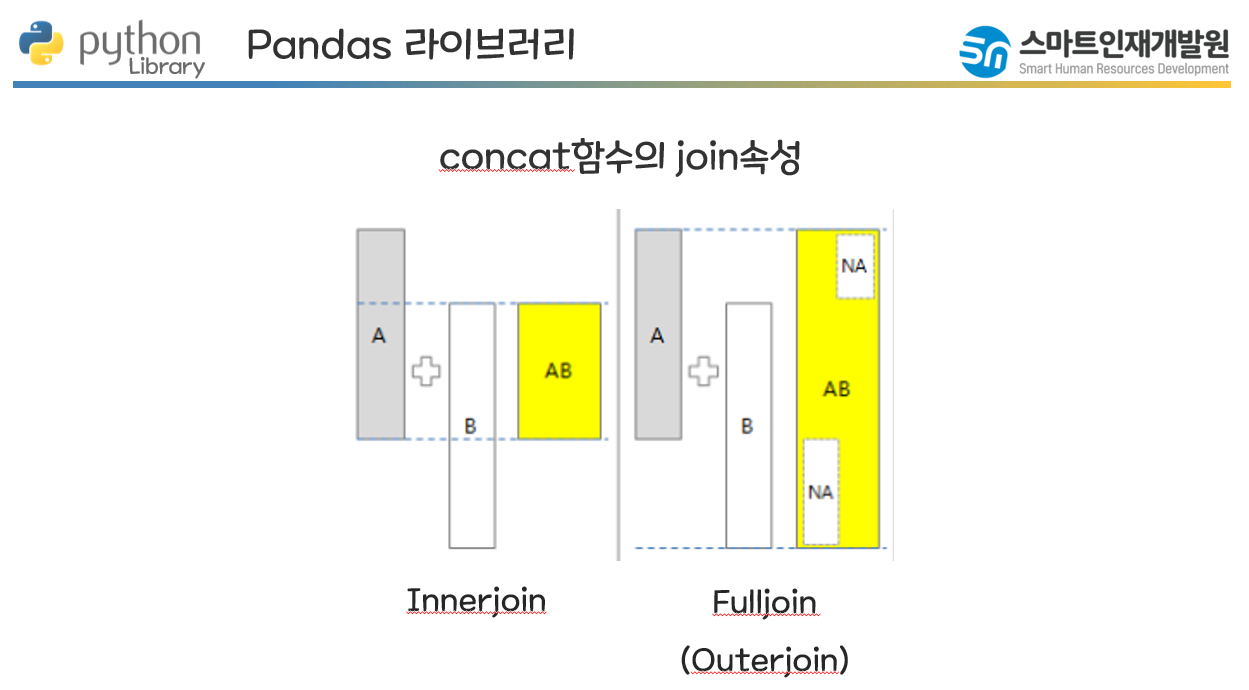

In [120]:
# concat() 은 full outer join 속성을 가지고 있다 (합집합) : 기본값
# inner join 속성 (r교집합)
pd.concat([df1,df4], axis = 1 , join = 'inner') #join argument 에 inner / outer


,A,B,C,B,D,F
2,A2,B2,C2,B2,D2,F2
3,A3,B3,C3,B3,D3,F3


In [125]:
# 기존의 인덱스(인덱스 이름)를 무시하고 새로운 인덱스 번호를 부여하는 방법
# ignore_index = False (기본값): 기존의 인덱스 이름을 사용한다, True: 새로운 인덱스 부여
pd.concat([df1,df4])
pd.concat([df1,df4], ignore_index = True)
pd.concat([df1,df4], verify_integrity= True) #인덱스 중복확인

ValueError: Indexes have overlapping values: Index([2, 3], dtype='int64')